In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

## Подготовка данных

In [2]:
users_data = pd.read_csv('C:\\Users\\ifedk\\JupyterNotebooks\\Final_Project_Var4\\Проект_4_active_users.csv',\
                         encoding='utf-8', sep=',')
users_data

,user_id,country,platform,sex
0,8029,Russia,ios,male
1,1735,Sweden,ios,male
2,7697,Russia,android,male
3,1421,Sweden,android,female
4,1704,Russia,ios,male
...,...,...,...,...
8336,2417,Sweden,ios,female
8337,3755,Russia,ios,male
8338,4594,Sweden,android,female
8339,7430,Sweden,ios,female


In [3]:
users_data.user_id.nunique()

8341

In [4]:
users_data.isnull().sum()

user_id     0
country     0
platform    0
sex         0
dtype: int64

In [5]:
users_data.dtypes

user_id      int64
country     object
platform    object
sex         object
dtype: object

In [6]:
groups_data = pd.read_csv('C:\\Users\\ifedk\\JupyterNotebooks\\Final_Project_Var4\\Проект_4_groups.csv',\
                         encoding='utf-8', sep=',')
groups_data

,user_id,group
0,9149,B
1,9150,B
2,9151,A
3,9152,B
4,9153,B
...,...,...
74571,1010,B
74572,7785,A
74573,1783,B
74574,1164,A


In [7]:
groups_data.group.nunique()

2

In [8]:
groups_data.user_id.nunique()

74576

In [9]:
groups_data.dtypes

user_id     int64
group      object
dtype: object

In [10]:
groups_data.isnull().sum()

user_id    0
group      0
dtype: int64

In [11]:
purchases_data = pd.read_csv('C:\\Users\\ifedk\\JupyterNotebooks\\Final_Project_Var4\\Проект_4_purchases.csv',\
                         encoding='utf-8', sep=',')
purchases_data

,user_id,revenue
0,4412,1000.0
1,9000,701.0
2,9001,700.0
3,9002,702.0
4,5790,1002.0
...,...,...
536,5648,1908.0
537,2277,1912.0
538,5032,1911.0
539,908,1910.0


In [12]:
purchases_data.user_id.nunique()

541

In [13]:
purchases_data.dtypes

user_id      int64
revenue    float64
dtype: object

In [14]:
purchases_data.isnull().sum()

user_id    0
revenue    0
dtype: int64

In [15]:
purchases_data.describe()

,user_id,revenue
count,541.000000,541.000000
mean,5383.439926,1069.754159
std,3036.517601,762.702202
min,62.000000,207.000000
25%,2557.000000,302.000000
50%,5530.000000,850.000000
75%,9013.000000,1909.000000
max,9148.000000,4660.000000


In [16]:
groups_data_with_pays = groups_data.merge(purchases_data, on = 'user_id', how = 'left')
groups_data_with_pays = groups_data_with_pays.fillna(0)
groups_data_with_pays

,user_id,group,revenue
0,9149,B,0.0
1,9150,B,0.0
2,9151,A,0.0
3,9152,B,0.0
4,9153,B,0.0
...,...,...,...
74571,1010,B,0.0
74572,7785,A,0.0
74573,1783,B,0.0
74574,1164,A,0.0


In [17]:
groups_data_with_pays_and_activity = groups_data_with_pays.merge(users_data, on = 'user_id', how = 'left')
groups_data_with_pays_and_activity

,user_id,group,revenue,country,platform,sex
0,9149,B,0.0,NaN,NaN,NaN
1,9150,B,0.0,NaN,NaN,NaN
2,9151,A,0.0,NaN,NaN,NaN
3,9152,B,0.0,NaN,NaN,NaN
4,9153,B,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
74571,1010,B,0.0,Sweden,android,male
74572,7785,A,0.0,Sweden,android,male
74573,1783,B,0.0,Russia,ios,female
74574,1164,A,0.0,Sweden,android,male


In [18]:
active_users_groups_and_pays = groups_data_with_pays.merge(users_data, on = 'user_id', how = 'right')
active_users_groups_and_pays = active_users_groups_and_pays.fillna(0)
active_users_groups_and_pays

,user_id,group,revenue,country,platform,sex
0,8029,B,0.0,Russia,ios,male
1,1735,B,0.0,Sweden,ios,male
2,7697,B,0.0,Russia,android,male
3,1421,B,0.0,Sweden,android,female
4,1704,B,0.0,Russia,ios,male
...,...,...,...,...,...,...
8336,2417,B,0.0,Sweden,ios,female
8337,3755,A,590.0,Russia,ios,male
8338,4594,B,0.0,Sweden,android,female
8339,7430,B,0.0,Sweden,ios,female


## Метрики

In [19]:
active_users_A = active_users_groups_and_pays.query('group == "A"')
active_users_B = active_users_groups_and_pays.query('group == "B"')

In [20]:
#Средний чек 

In [21]:
average_revenue_A = active_users_A.revenue.sum() / active_users_A.query('revenue > 0').shape[0]
average_revenue_A

943.5641025641025

In [22]:
average_revenue_B = active_users_B.revenue.sum() / active_users_B.query('revenue > 0').shape[0]
average_revenue_B

1267.875796178344

In [23]:
#Конверсия

In [24]:
conversion_A = active_users_A.query('revenue > 0').user_id.nunique() / active_users_A.user_id.nunique()
conversion_A

0.05071521456436931

In [25]:
conversion_B = active_users_B.query('revenue > 0').user_id.nunique() / active_users_B.user_id.nunique()
conversion_B

0.046156107599588415

In [26]:
#ARPPU

In [27]:
repeat_purchases_A = active_users_A.query('revenue > 0').shape[0] / active_users_A.query('revenue > 0').user_id.nunique()

In [28]:
repeat_purchases_B = active_users_B.query('revenue > 0').shape[0] / active_users_B.query('revenue > 0').user_id.nunique()

In [29]:
ARPPU_A = average_revenue_A * repeat_purchases_A
ARPPU_A

943.5641025641025

In [30]:
ARPPU_B = average_revenue_B * repeat_purchases_B
ARPPU_B

1267.875796178344

In [31]:
#ARPU

In [32]:
ARPU_A = conversion_A * ARPPU_A
ARPU_A

47.85305591677503

In [33]:
ARPU_B = conversion_B * ARPPU_B
ARPU_B

58.520211671321476

## Анализ

Проведём анализ среднего чека на предмет статистической достоверности данного изменения. Нулевая гипотеза – средний чек при использовании новой модели оплаты не поменялся, ненулевая гипотеза – средний чек изменился при использовании новой системы оплаты. 

In [34]:
users_with_pay = active_users_groups_and_pays.query('revenue > 0')

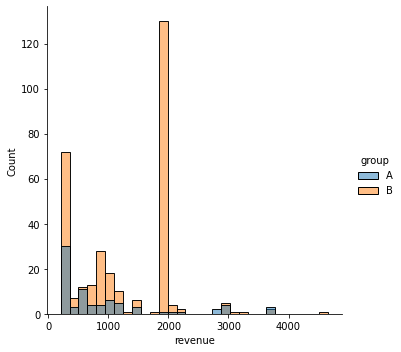

In [35]:
sns.displot(users_with_pay, x = 'revenue', hue = 'group',bins=30)

In [36]:
A_data = users_with_pay[users_with_pay['group'] == "A"]['revenue']
B_data = users_with_pay[users_with_pay['group'] == "B"]['revenue']

In [37]:
#Проверим распределение на нормальность

In [38]:
print('', stats.shapiro(A_data),'\n',stats.shapiro(B_data))

 ShapiroResult(statistic=0.7358548641204834, pvalue=1.5417730980793465e-10) 
 ShapiroResult(statistic=0.8552882671356201, pvalue=1.665431681028873e-16)


In [39]:
# так как распределение ненормальное, нецелесообразно использовать t-критерий стьюдента -> манн уитни или бутстрап

In [40]:
stats.mannwhitneyu(A_data, B_data)

MannwhitneyuResult(statistic=8961.0, pvalue=0.00023939080114586078)

In [58]:
# p-value меньше 0.05, можно принять ненулевую гипотезу

Проведём анализ взаимосвязи изменения значения конверсии и системы оплаты. Нулевая гипотеза – взаимосвязь конверсии и изменения системы оплаты отсутствует, ненулевая гипотеза – существует взаимосвязь конверсии и изменения системы оплаты.

In [ ]:
#Для проверки используем Хи-квадрат, так как переменные категориальные

In [90]:
active_users_groups_and_pays['have_pay'] = active_users_groups_and_pays.revenue.apply(lambda x: 'pay' if x > 0 else 'not_pay')

In [91]:
active_users_groups_and_pays

,user_id,group,revenue,country,platform,sex,have_pay
0,8029,B,0.0,Russia,ios,male,not_pay
1,1735,B,0.0,Sweden,ios,male,not_pay
2,7697,B,0.0,Russia,android,male,not_pay
3,1421,B,0.0,Sweden,android,female,not_pay
4,1704,B,0.0,Russia,ios,male,not_pay
...,...,...,...,...,...,...,...
8336,2417,B,0.0,Sweden,ios,female,not_pay
8337,3755,A,590.0,Russia,ios,male,pay
8338,4594,B,0.0,Sweden,android,female,not_pay
8339,7430,B,0.0,Sweden,ios,female,not_pay


In [93]:
chi2_table = pd.crosstab( active_users_groups_and_pays.have_pay,active_users_groups_and_pays.group)
chi2_table

group,A,B
have_pay,,
not_pay,1460,6489
pay,78,314


In [94]:
from scipy.stats import chi2_contingency

In [95]:
stat, p, dof, expected = chi2_contingency(chi2_table)
p

0.48625240457231045

In [ ]:
# p-value больше 0.05, различия в конверсии нельзя считать статистически значимыми

## Замечания к эксперименту

In [41]:
#Соотношение количества user_id в контрольной и тестовой группах.

In [42]:
groups_data.groupby('group').agg({'user_id': 'count'})

,user_id
group,
A,14693
B,59883


In [43]:
active_users_groups_and_pays.groupby('group').agg({'user_id': 'count'})

,user_id
group,
A,1538
B,6803


In [44]:
#Качественная репрезентативность нарушена

In [45]:
active_users_groups_and_pays.groupby(['country','group']).agg({'user_id': 'count'})

user_id
country group         
Russia  A          915
        B         4492
Sweden  A          623
        B         2311

In [46]:
#Только уникальные user_id в таблице purchases

In [47]:
purchases_data.user_id.nunique()

541

In [48]:
purchases_data.shape[0]

541

In [49]:
#Нет дат и времени оплат

In [50]:
purchases_data.dtypes

user_id      int64
revenue    float64
dtype: object

In [51]:
#В таблице purchases есть user_id, которые отсутствуют в таблице active_users

In [52]:
purchases_data.merge(users_data, on = 'user_id', how = 'left').query('country.isna() == True')

,user_id,revenue,country,platform,sex
1,9000,701.0,NaN,NaN,NaN
2,9001,700.0,NaN,NaN,NaN
3,9002,702.0,NaN,NaN,NaN
5,9003,641.0,NaN,NaN,NaN
6,9004,590.0,NaN,NaN,NaN
...,...,...,...,...,...
508,9144,209.0,NaN,NaN,NaN
512,9145,301.0,NaN,NaN,NaN
521,9146,207.0,NaN,NaN,NaN
530,9147,408.0,NaN,NaN,NaN


In [53]:
#Например, у user_id == 9000 нет данных об активности, но есть оплата

In [54]:
purchases_data.query('user_id == 9000')

,user_id,revenue
1,9000,701.0


In [55]:
users_data.query('user_id == 9000')

,user_id,country,platform,sex


In [56]:
#списания по подписке маловероятно, так как на 149 таких user_id приходится 34 разных оплаты

In [57]:
purchases_data.merge(users_data, on = 'user_id', how = 'left').query('country.isna() == True').revenue.nunique()

34